# **MDI230 - Projet Epidémiologie**

$Student : $

$\textcolor{orange}{
    - \Large Zakaria\ Akil\\
    - \Large Ayoub\ Benabbou\\
}
$

---

<div style="background: linear-gradient(to right, #ff0000, #0000ff); padding: 15px;">
    <h2 style="color: white;"><strong> Versions des modules utilisés :</h2>
</div>

- Pandas version:  2.0.3
- Numpy version:  1.24.3
- Seaborn version:  0.12.2
- Matplotlib version:  3.7.2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.integrate import odeint
try : 
    import networkx as nx
except ImportError:
    !pip install networkx matplotlib
    import networkx as nx

In [3]:
#printing versions of libraries
print("Pandas version: ", pd.__version__)
print("Numpy version: ", np.__version__)
print("Seaborn version: ", sns.__version__)
print("Matplotlib version: ", plt.matplotlib.__version__)
print("Networkx version: ", nx.__version__)

Pandas version:  2.0.3
Numpy version:  1.24.3
Seaborn version:  0.12.2
Matplotlib version:  3.7.2
Networkx version:  3.1


<div style="background: linear-gradient(to right, #ff0000, #0000ff); padding: 15px;">
    <h2 style="color: white;"><strong>Approche :</h2>
</div>

Il s'agit de voir les différences entre le modèle markovien et le modèle déterministe de la diffusion d'une épidémie.

On modélise le problème avec le modèle $\textbf{SIR}$.

L'espace des états $E = \{(S, I, R) / S + I + R= N \}$, avec N : le nombre totale de personnes. On note ainsi les trois catégories : 

- $S$ : Le nombre de personnes susceptibles
- $I$ : Le nombre de personnes infectées
- $R$ : Le nombre de personnes récuperées (guéries ou mortes)

Une personne susceptible est infectée avec un taux d'infection $\beta > 0$ (en $\text{jour}^{-1}$), et une personne infecté est récuperée avec un taux de récupération $\gamma > 0$ (en $\text{jour}^{-1}$). 
- Le système est donc régit par le système d'équations differentielles suivant : 

$$
\boxed {\begin{cases}
 \frac{dS}{dt} = - \beta .S.I \\ 
 \frac{dI}{dt} = \beta .S.I - \gamma .I \\
 \frac{dR}{dt} = \gamma .I \\  
\end{cases}}$$


Ces équations décrivent comment les différentes populations évoluent au fil du temps. La première équation explique la diminution de la population susceptible à mesure que les individus sont infectés ($\beta$). La deuxième équation indique l'augmentation de la population infectée due aux nouvelles infections ($\beta$) et sa diminution à mesure que les individus se rétablissent ($\gamma$). Enfin, la troisième équation montre comment la population guérie s'accroît à mesure que les individus se remettent de la maladie. Ce systeme décrit donc le model SIR déterministique.


Nous pouvons illustrer le problème à l'aide du diagramme des états suivant : 

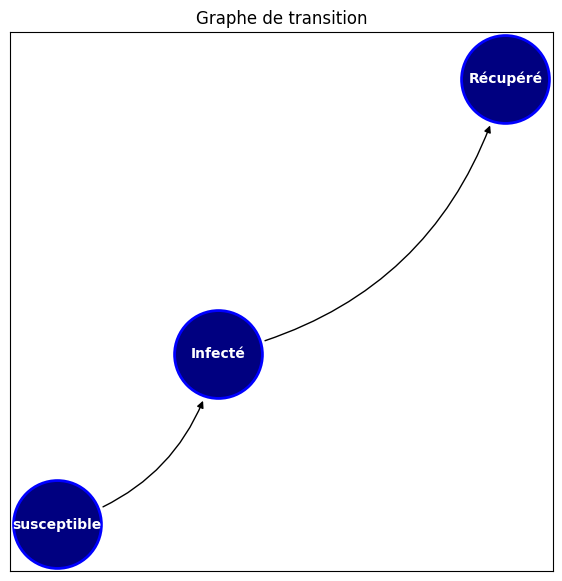

In [4]:
# Dessiner le graphe de transition
G = nx.DiGraph()
plt.figure(figsize=(7, 7))
# Ajouter les nœuds
G.add_edge('susceptible', 'Infecté')
G.add_edge('Infecté', 'Récupéré')

# Définir la disposition des nœuds
pos = nx.spring_layout(G)

nx.draw_networkx_edges(G, pos, edgelist=G.edges(), connectionstyle="arc3,rad=0.3", arrows=True, arrowstyle='-|>', node_size=5000)
nx.draw_networkx_nodes(G, pos, node_size=4000, node_color='navy', edgecolors='blue', linewidths=2)

# Ajouter les étiquettes des nœuds
nx.draw_networkx_labels(G, pos, font_size=10, font_color='white', font_weight='bold')
plt.title('Graphe de transition')
plt.show()

<div style="background: linear-gradient(to right, #ff0000, #0000ff); padding: 15px;">
    <h2 style="color: white;"><strong>Travail à effectuer :</h2>
</div>

$\textcolor{darkgray}{Question\ 1:}$
Ecrire un code qui résout et affiche le système déterministe SIR, prenant en entrée les paramètres beta et gamma (voir poly)

$\textcolor{orange}{\to Réponse\ 1:}$

In [5]:
def SIR_deterministic(etat, t, beta, gamma):
    ''' Modèle SIR
    params:
    ------
    etat: Vecteur des populations S, I et R
    t: Temps
    beta: Taux d'infection
    gamma: Taux de récupération
    
    returns:
    -------
    Retourne les taux de variation des populations S, I et R
    '''
    S, I, R = etat
    dSdt = - beta * S * I
    dIdt = beta * S * I - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

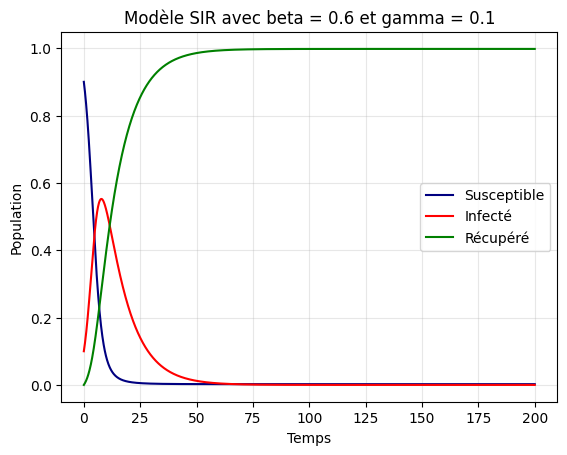

In [6]:
# Paramètres du modèle
beta = 0.6   # Taux d'infection en jours^-1
gamma = 0.1  # Taux de récupération

# Conditions initiales : [990, 10, 0]
S0 = 0.9    # pourcentage de Population initialement susceptible
I0 = 0.1  # pourcentage Population initialement infectée
R0 = 0       # pourcentage Population initialement récupérée
etat0 = S0, I0, R0

# Temps
t = np.linspace(0, 200, 2000)

# Résolution du système d'équations différentielles
sol = odeint(SIR_deterministic, etat0, t, args=(beta, gamma))
S, I, R = sol.T

# Affichage des résultats
plt.plot(t, S, label='Susceptible', color='navy')
plt.plot(t, I, label='Infecté', color='red')
plt.plot(t, R, label='Récupéré', color='green')
plt.xlabel('Temps')
plt.ylabel('Population')
plt.title('Modèle SIR avec beta = {} et gamma = {}'.format(beta, gamma))
plt.legend()
plt.grid(alpha=0.3)
plt.show()


$\textcolor{darkgray}{Question\ 2:}$
Ecrire un code qui simule l'évolution du processus de Markov pour une population de N individus avec les mêmes paramètres beta et gamma

$\textcolor{orange}{\to Réponse\ 2:}$
Calculons les 2 taux de transitions possibles :

- $q_{SI} = S.I.\beta /N $

- $q_{IR} = I. \gamma $

Cela se justifie par le fait que chaque personne a une probabilité beta de se faire infecter sachant qu'elle est en contact avec une personne infectée (equation 1), et que chaque personne a une probabilité gamma de guérir sachant qu'elle est infectée.

In [7]:
#Variables globales
N = 100 # Nombre de personnes
beta= 0.6 # Taux d'infection minute (en jour^-1)
gamma = 5 # Taux de récupération (en jour^-1)

In [8]:
# Modèle SIR avec vaccination
class MarkovSIR:
    def __init__(self, beta, gamma, S0, I0, R0):
        self.beta = beta
        self.gamma = gamma
        self.S = S0
        self.I = I0
        self.R = R0
    
    def transition(self):
        '''
        Fonction de transition
        ----------------------
        returns:
        -------
        Retourne la transition élue et la somme des qi.
        '''
        if self.I == 0:
            return 'fin', 0
        q_SI = self.beta * self.S * self.I / (self.S + self.I + self.R) # Car chaque personne a une probabilité beta de se faire infecter sachant qu'elle est en contact avec une personne infectée
        q_IR = self.gamma * self.I # Car chaque personne a une probabilité gamma de guérir sachant qu'elle est infectée
        
        q_total = q_SI + q_IR
        
        q_SI /=  q_total
        q_IR /=  q_total
        
        return np.random.choice(['infection', 'récupération'], p=[q_SI, q_IR]), q_total
    
    def update_etat(self):
        '''
        Mise à jour de l'état
        ---------------------
        '''
        transition, _ = self.transition()
        if transition == 'infection':
            self.S -= 1
            self.I += 1
        elif transition == 'récupération':
            self.I -= 1
            self.R += 1
        else:
            None
    
    def simulate(self, days):
        '''
        Simulation du modèle
        ---------------------
        params:
        ------
        days: Nombre de jours de la simulation

        returns:
        -------
        Retourne l'historique des populations S, I et R
        '''

        history = {'t' : [0], 'S': [self.S], 'I': [self.I], 'R': [self.R]}
        t = 0 
        while t < days:
            _ ,q_total = self.transition()
            if q_total ==0 : break
            # Calcul de la duree qui nous separe de la prochaine transition --> on fait le minimum des lois exponentielles.
            e = np.random.exponential(1/q_total) # cette méthode prend en parametre beta = 1/lambda et pas lambda.
            t += e # Timr jumping
            if t < days:
                self.update_etat()
                history['t'].append(t)
                history['S'].append(self.S)
                history['I'].append(self.I)
                history['R'].append(self.R)
        return history

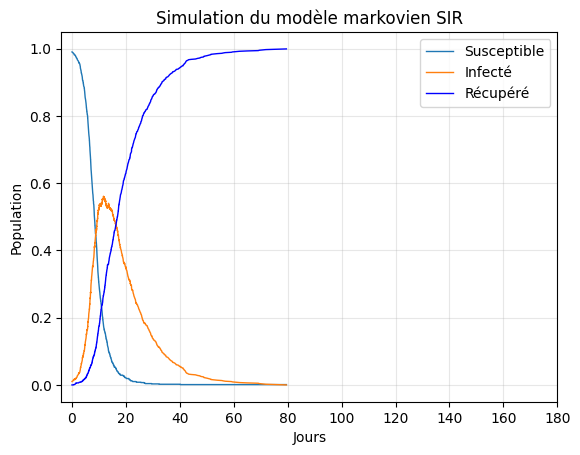

In [9]:
# Paramètres du modèle
beta = 0.6   # Taux d'infection
gamma = 0.1  # Taux de récupération
duree_de_simultion = 200 # Durée de la simulation

# Conditions initiales
S0 = 990    # Population initialement susceptible
I0 = 10     # Population initialement infectée
R0 = 0      # Population initialement récupérée

# Instanciation du modèle
model = MarkovSIR(beta, gamma, S0, I0, R0)

# Simulation sur 200 jours
simulation = model.simulate(duree_de_simultion)

# Affichage des résultats
plt.plot(simulation['t'], np.array(simulation['S'])/1000, label='Susceptible', linewidth=1)
plt.plot(simulation['t'], np.array(simulation['I'])/1000, label='Infecté', linewidth=1)
plt.plot(simulation['t'], np.array(simulation['R'])/1000, label='Récupéré', color='blue', linewidth=1)
plt.xlabel('Jours')
plt.ylabel('Population')
plt.xticks(np.arange(0, 200, 20))
plt.title('Simulation du modèle markovien SIR')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

- **Nous remarquons que nous obtenons parfaitement les mêmes allues que le modèle déterministe**. Les tendances du modèle de Markov sont tronquées parce que nous avons dû arrêter la simulation dès qu'il n'y a plus d'infectés.

$\textcolor{darkgray}{Question\ 3:}$
Trouver des couples de valeurs (beta,gamma) où tout le monde est retiré sur le long terme modèle.

$\textcolor{orange}{\to Réponse\ 3:}$

- On considère le quotient :  $R_0 = \frac{\beta}{\gamma}$

On sait que $r_{\infty}$ est solution de l'équation : $1 - r_{\infty} = s(0). exp(- R_0. r_{\infty})$

Considerer que tout les individus ont été récupérés revient à considérer que $r_{\infty} = 1$ 

Et donc nous aurons forcément $exp(- R_0. r_{\infty}) \to 0$

Donc : $R_0 \to \infty$

- Conclusion : Choisir $\beta >> \gamma$  sera suffisant pour avoir tous les individus dans R.

$\textcolor{darkgray}{Question\ 4:}$
Trouver des couples de valeurs (beta,gamma) où il y a une partie de la population qui reste susceptible et une autre qui est retirée

$\textcolor{orange}{\to Réponse\ 4:}$

- Le cas ou $\beta < \gamma$ est un état qui n'est pas intéressant car l'épidémie n'évolue pas.
- Il suffit donc que $\beta > \gamma$ mais de telle façon que le $R_0$ n'est pas trop grand pour avoir tous les individus distriués uniquement entre "Susceptible" et "Retiré"


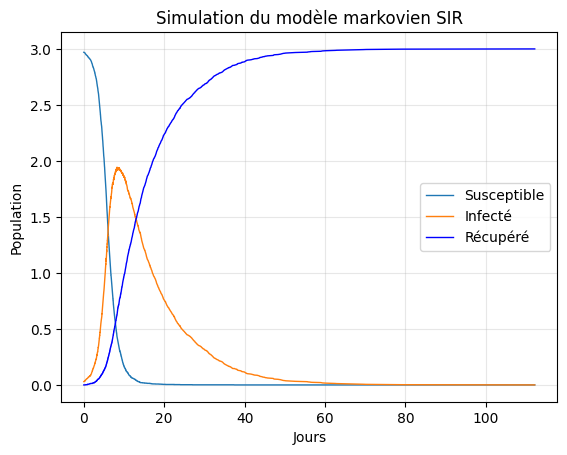

In [12]:
# simuler pour beta >> gamma

beta = 0.9   # Taux d'infection
gamma = 0.1  # Taux de récupération

# Instanciation du modèle
model = MarkovSIR(beta, gamma, S0, I0, R0)

# Simulation sur 200 jours
simulation = model.simulate(duree_de_simultion)

# Affichage des résultats
plt.plot(simulation['t'], np.array(simulation['S'])/1000, label='Susceptible', linewidth=1)
plt.plot(simulation['t'], np.array(simulation['I'])/1000, label='Infecté', linewidth=1)
plt.plot(simulation['t'], np.array(simulation['R'])/1000, label='Récupéré', color='blue', linewidth=1)
plt.xlabel('Jours')
plt.ylabel('Population')
plt.title('Simulation du modèle markovien SIR')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

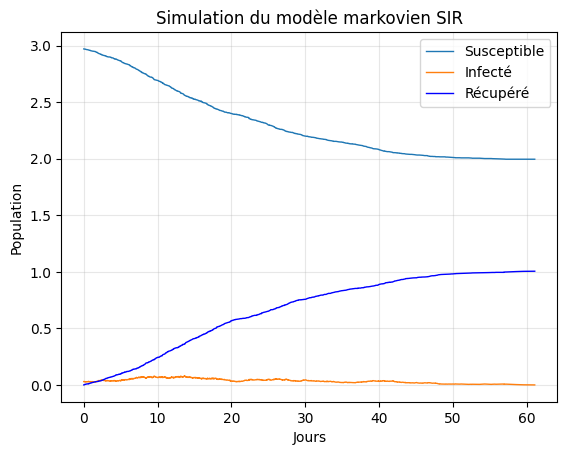

In [13]:
# simuler pour beta > gamma

beta = 0.6   # Taux d'infection
gamma = 0.5  # Taux de récupération

# Instanciation du modèle
model = MarkovSIR(beta, gamma, S0, I0, R0)

# Simulation sur 200 jours
simulation = model.simulate(duree_de_simultion)

# Affichage des résultats
plt.plot(simulation['t'], np.array(simulation['S'])/1000, label='Susceptible', linewidth=1)
plt.plot(simulation['t'], np.array(simulation['I'])/1000, label='Infecté', linewidth=1)
plt.plot(simulation['t'], np.array(simulation['R'])/1000, label='Récupéré', color='blue', linewidth=1)
plt.xlabel('Jours')
plt.ylabel('Population')
plt.title('Simulation du modèle markovien SIR')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


$\textcolor{darkgray}{Question\ 5:}$
Illustrer sur des graphiques la convergence du processus de Markov renormalisé vers la solution du système déterministe

$\textcolor{orange}{\to Réponse\ 5:}$

**Théorème:**

Si on note $(S_N,I_N,R_N)$ processus de Markov qui donne l'&volution des  3 compartiments suivant le modèle Markovien pour la propagation de l'épidémie,;, et $(s(t),i(t),r(t))$ le vecteur qui donne la même évolution mais suivant le modèle déteriniste, pour une population de taille N, alors, quand $N \to  \infty$:

$$ \boxed{(\frac{S_N}{N},\frac{I_N}{N},\frac{R_N}{N})\to (s(t),i(t),r(t)) \text{  p.s} }$$ 


D'après ce théorème, si on augmente suffisemment la taille N de la population, on devrait avoir une courbe qui ressemble à celle obtenue grâce au modèle déterministe  SIR: 

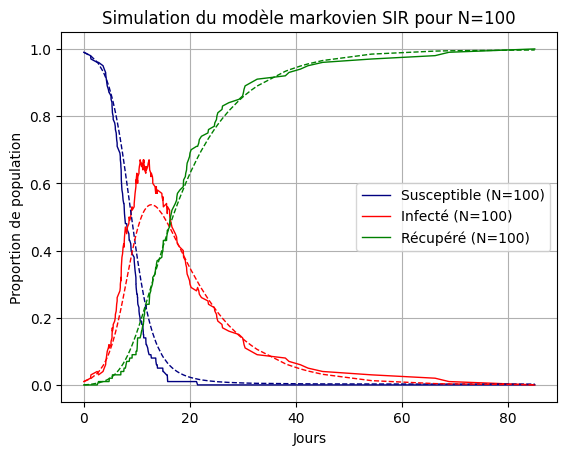

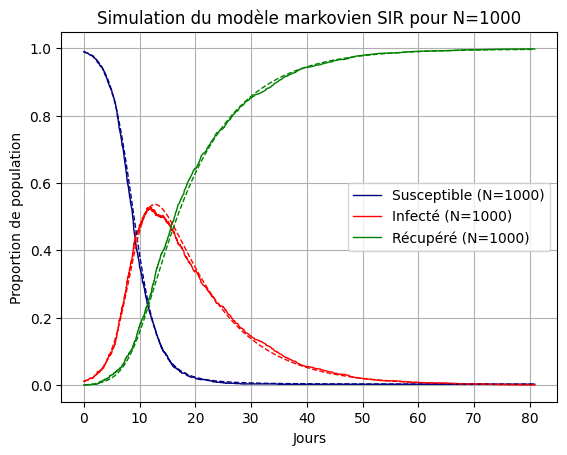

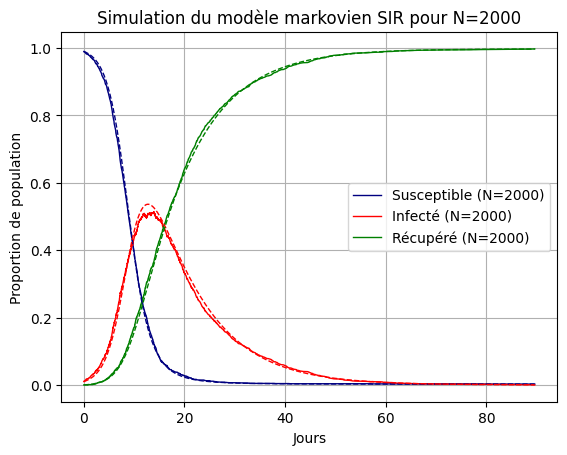

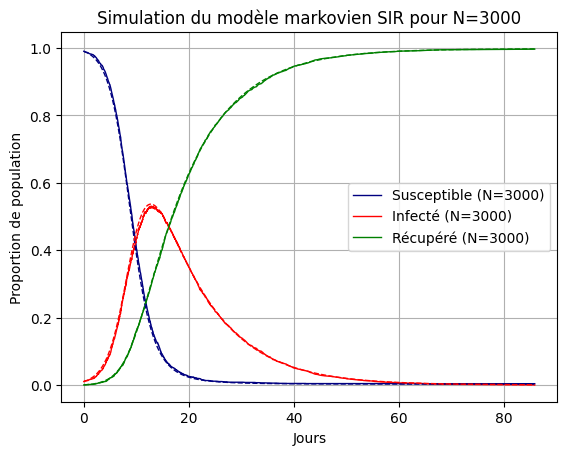

In [11]:
# Paramètres du modèle
beta = 0.6   # Taux d'infection
gamma = 0.1  # Taux de récupération
duree_de_simulation = 200

# Valeurs de N à tester
valeurs_de_N = [100, 1000, 2000, 3000]

# Simulation pour différentes valeurs de N
for N in valeurs_de_N:
    # Conditions initiales
    S0 = 0.99 * N    # Population initialement susceptible
    I0 = 0.01 * N    # Population initialement infectée
    R0 = 0           # Population initialement récupérée

    # Création du modèle markovien
    model = MarkovSIR(beta, gamma, S0, I0, R0)

    # Simulation sur la durée spécifiée
    simulation = model.simulate(duree_de_simulation)

    # Affichage des résultats
    plt.plot(simulation['t'], np.array(simulation['S']) / N, label=f'Susceptible (N={N})', color='navy', linewidth=1)
    plt.plot(simulation['t'], np.array(simulation['I']) / N, label=f'Infecté (N={N})', color='red', linewidth=1)
    plt.plot(simulation['t'], np.array(simulation['R']) / N, label=f'Récupéré (N={N})', color='green', linewidth=1)

    # Affichge des allures pour le model deterministe
    sol = odeint(SIR_deterministic, [0.99, 0.01, 0], simulation['t'], args=(beta, gamma))
    S, I, R = sol.T
    plt.plot(simulation['t'], S, '--', color='navy', linewidth=1)
    plt.plot(simulation['t'], I, '--', color='red', linewidth=1)
    plt.plot(simulation['t'], R, '--', color='green', linewidth=1)

    plt.xlabel('Jours')
    plt.ylabel('Proportion de population')
    plt.title(f'Simulation du modèle markovien SIR pour N={N}')
    plt.legend()
    plt.grid(True)
    plt.show()

- **On constate bien que lorsque la taille de la population augmente, les courbes du modèle markovien s'approchent de celles du modèle déterministe.**

<div style="background: linear-gradient(to right, #ff0000, #0000ff); padding: 15px;">
    <h2 style="color: white;"><strong>End</h2>
</div>